<a href="https://colab.research.google.com/github/srinisosale/python-pgpaiml/blob/main/Copy_of_Week2QuizWorkbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# to split the data into train and test
from sklearn.model_selection import train_test_split #sklearn package's randomized data spilliting function

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_squared_error


# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
# let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/KickStarterProjects.csv')

In [ ]:
# copying data to another variable to avoid any changes to original data
ksp=df.copy()

In [ ]:
# returns the first 5 rows
ksp.head()

,ID,name,subcategory,category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,09-10-2015,1000.000,11-08-2015 12:12,0.000,failed,0,GB,0.000,1533.950
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,01-11-2017,30000.000,02-09-2017 04:43,2421.000,failed,15,US,2421.000,30000.000
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,26-02-2013,45000.000,12-01-2013 00:20,220.000,failed,3,US,220.000,45000.000
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,16-04-2012,5000.000,17-03-2012 03:24,1.000,failed,1,US,1.000,5000.000
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,29-08-2015,19500.000,04-07-2015 08:35,1283.000,canceled,14,US,1283.000,19500.000


In [ ]:
ksp.shape

(378661, 14)

In [ ]:
ksp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   subcategory       378661 non-null  object 
 3   category          378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd_pledged_real  378661 non-null  float64
 13  usd_goal_real     378661 non-null  float64
dtypes: float64(4), int64(2), object(8)
memory usage: 40.4+ MB


In [ ]:
#drop the currency and goal columns
ksp.drop(['currency', 'goal'],axis=1,inplace=True)

In [ ]:
ksp.shape

(378661, 12)

In [ ]:
ksp.isnull().sum().sort_values(ascending=False)

name                4
ID                  0
subcategory         0
category            0
deadline            0
launched            0
pledged             0
state               0
backers             0
country             0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [ ]:
# counting the number of missing values per row
ksp.isnull().sum(axis=1).value_counts()

0    378657
1         4
dtype: int64

In [ ]:
# most rows don't have missing values now
num_missing = ksp.isnull().sum(axis=1)
num_missing.value_counts()

0    378657
1         4
dtype: int64

In [ ]:
for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print(f'For the rows with exactly {n} missing values, NAs are found in:')
        n_miss_per_col = ksp[num_missing == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print('\n\n')


For the rows with exactly 1 missing values, NAs are found in:
name    4
dtype: int64





In [ ]:
ksp.head()

,ID,name,subcategory,category,deadline,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,09-10-2015,11-08-2015 12:12,0.000,failed,0,GB,0.000,1533.950
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,01-11-2017,02-09-2017 04:43,2421.000,failed,15,US,2421.000,30000.000
2,1000004038,Where is Hank?,Narrative Film,Film & Video,26-02-2013,12-01-2013 00:20,220.000,failed,3,US,220.000,45000.000
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,16-04-2012,17-03-2012 03:24,1.000,failed,1,US,1.000,5000.000
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,29-08-2015,04-07-2015 08:35,1283.000,canceled,14,US,1283.000,19500.000


In [ ]:
# most rows don't have missing values now
num_missing = ksp.isnull().sum(axis=1)
num_missing.value_counts()

0    378657
1         4
dtype: int64

In [ ]:
ksp = ksp.dropna(axis=0)

In [ ]:
# most rows don't have missing values now
num_missing = ksp.isnull().sum(axis=1)
num_missing.value_counts()

0    378657
dtype: int64

In [ ]:
#unique project states
ksp['state'].unique()

array(['failed', 'canceled', 'successful', 'live', 'undefined',
       'suspended'], dtype=object)

In [ ]:
ksp['launched'].value_counts().plot.bar()
plt.title('launched')
plt.show()

In [ ]:
ksp.describe()

,ID,pledged,backers,usd_pledged_real,usd_goal_real
count,378657.000,378657.000,378657.000,378657.000,378657.000
mean,1074732169.039,9683.080,105.619,9059.018,45454.246
std,619087231.966,95636.510,907.190,90973.819,1152956.113
min,5971.000,0.000,0.000,0.000,0.010
25%,538249926.000,30.000,2.000,31.000,2000.000
50%,1075275666.000,620.000,12.000,624.380,5500.000
75%,1610148624.000,4076.000,56.000,4050.000,15500.000
max,2147476221.000,20338986.270,219382.000,20338986.270,166361390.700


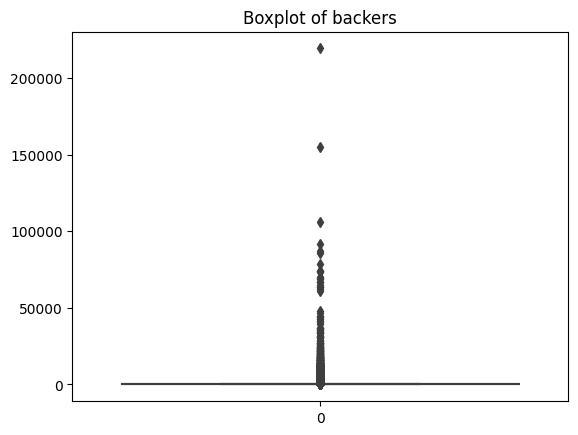

In [ ]:
sns.boxplot(ksp['backers'])
plt.title('Boxplot of backers')
plt.show()

KeyboardInterrupt: ignored

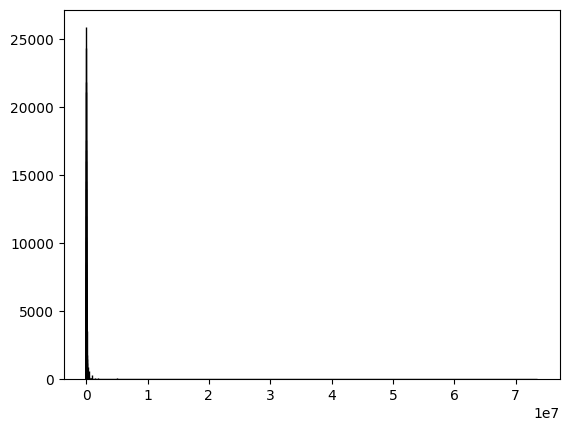

In [ ]:
sns.histplot(ksp['usd_goal_real'])
plt.title('Histplot of goal')
plt.show()

In [ ]:
ksp.pledged.quantile(0.6)

1411.6800000000046